# PROBLEMA DE NEGOCÍO:

## CRAIR UMA MAQUINA PREDITIVA PRA PRAVER A SOBREVIVÊNCIA DE UMA PESSOA COM CÂNCER

# IMPORTAÇÃO DE BIBLIOTECAS E DADOS

In [1]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('cancer.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# PRIMEIRAS VISUALIZAÇÕES

In [2]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# 

# TRADUÇÃO BASE DE DADOS

In [4]:
df_traduzida = df.rename(columns={'age':'idade','race':'corrida','Marital Status':'EstadoCivil','T Stage ':'TStage','N Stage':'NStage','6th Stage':'THStage','differentiate':'diferenciar','Grade':'Nota','Tumor Size':'TamanhoTumor','Estrogen Status':'StatusEstrogênio','Progesterone Status':'StatusProgesterona','Regional Node Examined':'NoduloRegionalExaminado','Reginol Node Positive':'NoduloReginolPositivo','Survival Months':'MesesHospital'})
df_traduzida.head(5)

,Age,Race,EstadoCivil,TStage,NStage,THStage,diferenciar,Nota,A Stage,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


# TRATAMENTO E MANIPULAÇAO DE DADOS 

### EXCLUINDO VARIAVÉIS

In [5]:
del df_traduzida['Race']
del df_traduzida['A Stage']
del df_traduzida['EstadoCivil']
del df_traduzida['Nota']

### VERIFICANDO VALORES NULOS E DUPLICADOS 

In [6]:
df_traduzida.duplicated().sum()

1

In [7]:
df_traduzida = df_traduzida.drop_duplicates()

In [8]:
(df_traduzida.isnull().sum() / len(df_traduzida['Age']))*100

Age                       0.00
TStage                    0.00
NStage                    0.00
THStage                   0.00
diferenciar               0.00
TamanhoTumor              0.00
StatusEstrogênio          0.00
StatusProgesterona        0.00
NoduloRegionalExaminado   0.00
NoduloReginolPositivo     0.00
MesesHospital             0.00
Status                    0.00
dtype: float64

In [9]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4023 non-null   int64 
 1   TStage                   4023 non-null   object
 2   NStage                   4023 non-null   object
 3   THStage                  4023 non-null   object
 4   diferenciar              4023 non-null   object
 5   TamanhoTumor             4023 non-null   int64 
 6   StatusEstrogênio         4023 non-null   object
 7   StatusProgesterona       4023 non-null   object
 8   NoduloRegionalExaminado  4023 non-null   int64 
 9   NoduloReginolPositivo    4023 non-null   int64 
 10  MesesHospital            4023 non-null   int64 
 11  Status                   4023 non-null   object
dtypes: int64(5), object(7)
memory usage: 408.6+ KB


# ANÁLISE EXPLORATORIA

### ESTATÍSTICA

In [10]:
df_traduzida.describe()

,Age,TamanhoTumor,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital
count,4023.00,4023.00,4023.00,4023.00,4023.00
mean,53.97,30.48,14.36,4.16,71.30
std,8.96,21.12,8.10,5.11,22.92
min,30.00,1.00,1.00,1.00,1.00
25%,47.00,16.00,9.00,1.00,56.00
50%,54.00,25.00,14.00,2.00,73.00
75%,61.00,38.00,19.00,5.00,90.00
max,69.00,140.00,61.00,46.00,107.00


### MODA

In [11]:
from statistics import mode

mode(df_traduzida['Age'])

46

In [12]:
mode(df_traduzida['TamanhoTumor'])

15

In [13]:
mode(df_traduzida['StatusEstrogênio'])

'Positive'

In [14]:
mode(df_traduzida['StatusProgesterona'])

'Positive'

In [15]:
mode(df_traduzida['NoduloRegionalExaminado'])

13

In [16]:
mode(df_traduzida['NoduloReginolPositivo'])

1

In [17]:
mode(df_traduzida['MesesHospital'])

69

### ASSIMETRIA

In [18]:
df_traduzida['MesesHospital'].skew()

-0.5904470527208211

In [19]:
df_traduzida['NoduloRegionalExaminado'].skew()

0.8288846261548554

In [20]:
df_traduzida['TamanhoTumor'].skew()

1.7393864902369982

In [21]:
df_traduzida['Age'].skew()

-0.2199315303266893

### HISTOGRAMA

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'TamanhoTumor'}>],
       [<Axes: title={'center': 'NoduloRegionalExaminado'}>,
        <Axes: title={'center': 'NoduloReginolPositivo'}>],
       [<Axes: title={'center': 'MesesHospital'}>, <Axes: >]],
      dtype=object)

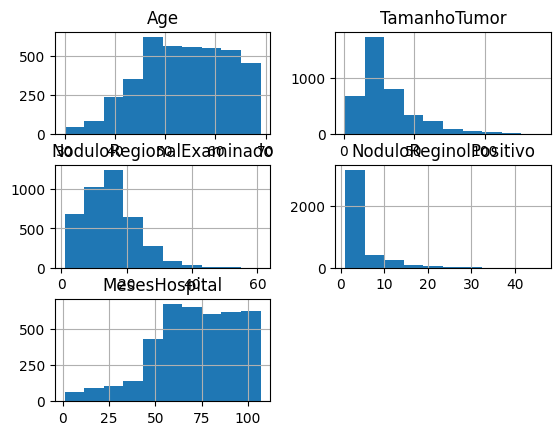

In [22]:
df_traduzida.hist()

### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

### COPIANDO TABELA 

In [23]:
df_traduzida.head()

,Age,TStage,NStage,THStage,diferenciar,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
0,68,T1,N1,IIA,Poorly differentiated,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,41,Positive,Positive,3,1,50,Alive


In [24]:
import copy

# Suponha que 'tabela_original' seja a tabela que você deseja copiar
tabela_copiada = copy.copy(df_traduzida)


In [25]:
# Cria o encoder
lb = LabelEncoder()
# Aplica o encoder nas variáveis que estão com string
tabela_copiada['TStage'] = lb.fit_transform(tabela_copiada['TStage'])
tabela_copiada['NStage'] = lb.fit_transform(tabela_copiada['NStage'])
tabela_copiada['THStage'] = lb.fit_transform(tabela_copiada['THStage'])
tabela_copiada['diferenciar'] = lb.fit_transform(tabela_copiada['diferenciar'])
tabela_copiada['StatusEstrogênio'] = lb.fit_transform(tabela_copiada['StatusEstrogênio'])
tabela_copiada['StatusProgesterona'] = lb.fit_transform(tabela_copiada['StatusProgesterona'])
tabela_copiada['Status'] = lb.fit_transform(tabela_copiada['Status'])

In [26]:
tabela_copiada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4023 non-null   int64
 1   TStage                   4023 non-null   int32
 2   NStage                   4023 non-null   int32
 3   THStage                  4023 non-null   int32
 4   diferenciar              4023 non-null   int32
 5   TamanhoTumor             4023 non-null   int64
 6   StatusEstrogênio         4023 non-null   int32
 7   StatusProgesterona       4023 non-null   int32
 8   NoduloRegionalExaminado  4023 non-null   int64
 9   NoduloReginolPositivo    4023 non-null   int64
 10  MesesHospital            4023 non-null   int64
 11  Status                   4023 non-null   int32
dtypes: int32(7), int64(5)
memory usage: 298.6 KB


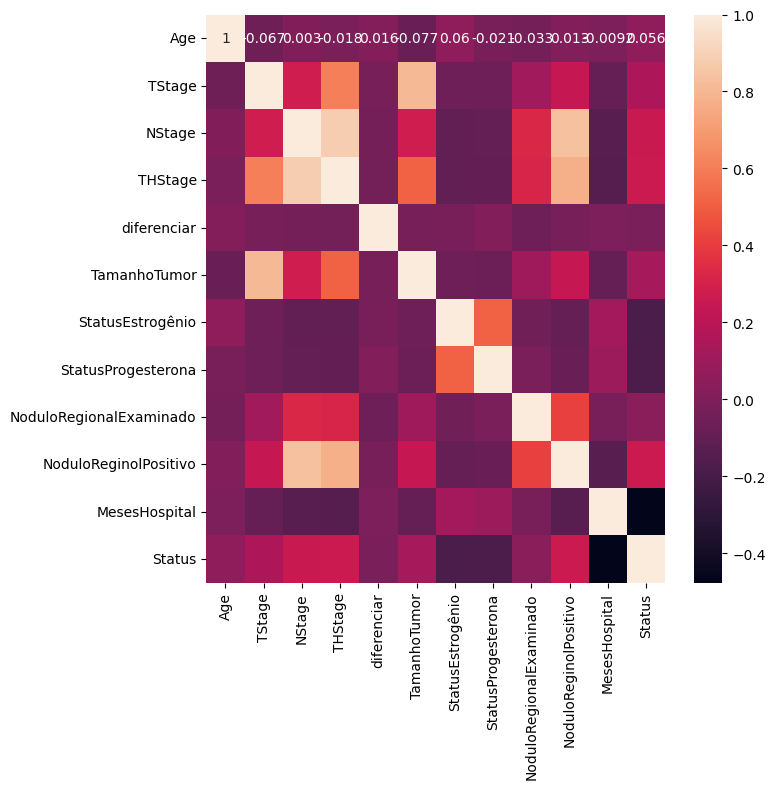

In [27]:
# Suponha que você deseja selecionar apenas colunas numéricas
df_numeric = tabela_copiada.select_dtypes(include=['float64', 'int64','int32'])

# Configurações de plot que você já especificou
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True

# Crie o heatmap apenas para as colunas numéricas
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [28]:
# Calculando a matriz de correlação
df_numeric.corr()

,Age,TStage,NStage,THStage,diferenciar,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
Age,1.00,-0.07,0.00,-0.02,0.02,-0.08,0.06,-0.02,-0.03,0.01,-0.01,0.06
TStage,-0.07,1.00,0.28,0.61,-0.03,0.81,-0.06,-0.06,0.11,0.24,-0.09,0.15
NStage,0.00,0.28,1.00,0.88,-0.04,0.28,-0.10,-0.09,0.33,0.84,-0.14,0.26
THStage,-0.02,0.61,0.88,1.00,-0.04,0.51,-0.11,-0.10,0.32,0.77,-0.15,0.26
diferenciar,0.02,-0.03,-0.04,-0.04,1.00,-0.03,-0.02,0.01,-0.06,-0.03,-0.00,-0.02
TamanhoTumor,-0.08,0.81,0.28,0.51,-0.03,1.00,-0.06,-0.07,0.10,0.24,-0.09,0.13
StatusEstrogênio,0.06,-0.06,-0.10,-0.11,-0.02,-0.06,1.00,0.51,-0.04,-0.09,0.13,-0.18
StatusProgesterona,-0.02,-0.06,-0.09,-0.10,0.01,-0.07,0.51,1.00,-0.02,-0.08,0.10,-0.18
NoduloRegionalExaminado,-0.03,0.11,0.33,0.32,-0.06,0.10,-0.04,-0.02,1.00,0.41,-0.02,0.03
NoduloReginolPositivo,0.01,0.24,0.84,0.77,-0.03,0.24,-0.09,-0.08,0.41,1.00,-0.14,0.26


### VALORES ÚNICO EM CADA VARIAVEL

In [29]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

Age : 40
TStage : 4
NStage : 3
THStage : 5
diferenciar : 4
TamanhoTumor : 110
StatusEstrogênio : 2
StatusProgesterona : 2
NoduloRegionalExaminado : 54
NoduloReginolPositivo : 38
MesesHospital : 107
Status : 2


## verificação de outliers 

Age : int64
TamanhoTumor : int64
NoduloRegionalExaminado : int64
NoduloReginolPositivo : int64
MesesHospital : int64


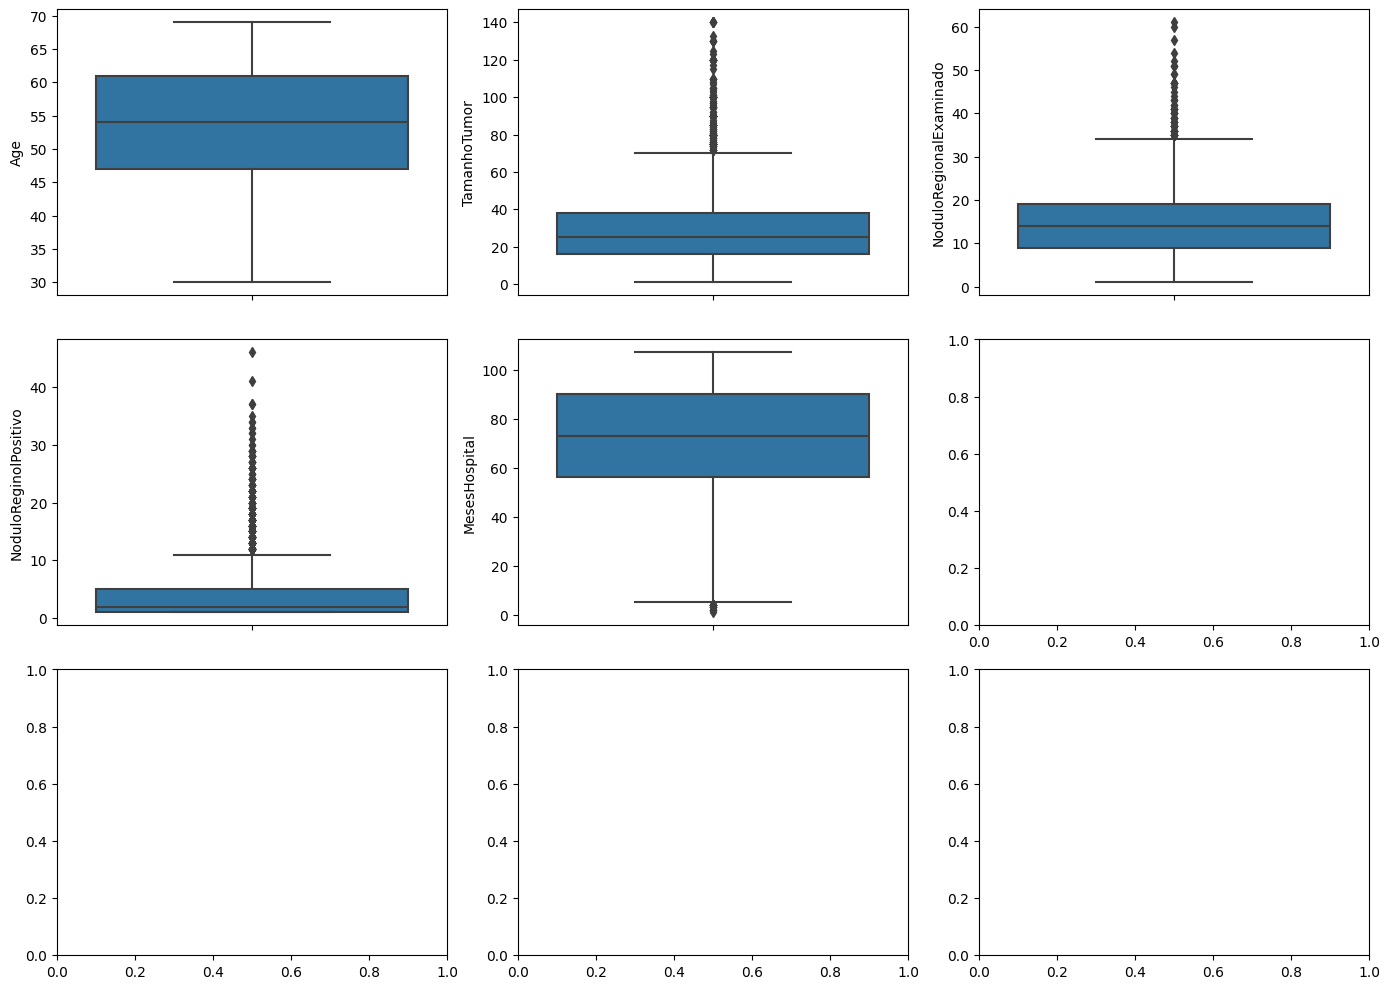

In [30]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

# ANÁLISE DE DADOS

In [31]:
df_traduzida.head(1)

,Age,TStage,NStage,THStage,diferenciar,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
0,68,T1,N1,IIA,Poorly differentiated,4,Positive,Positive,24,1,60,Alive


###  USANDO O PROFILLING 

In [32]:
from ydata_profiling import ProfileReport
report = df_traduzida.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

## PESSOAS QUE NÃO MORRERAM

In [33]:
NaoMorreu = df_traduzida.loc[df_traduzida['Status'] == 'Alive']
NaoMorreu.head(1)

,Age,TStage,NStage,THStage,diferenciar,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
0,68,T1,N1,IIA,Poorly differentiated,4,Positive,Positive,24,1,60,Alive


### AGRUPAMENTO DE DADOS DAS PESSOAS QUE NÃO MORREU

In [34]:
NaoMorreu.groupby(NaoMorreu['NStage']).size()

NStage
N1    2461
N2     655
N3     291
dtype: int64

In [35]:
NaoMorreu.groupby(NaoMorreu['THStage']).size() 

THStage
IIA     1208
IIB      995
IIIA     866
IIIB      47
IIIC     291
dtype: int64

In [36]:
NaoMorreu.groupby(NaoMorreu['diferenciar']).size()

diferenciar
Moderately differentiated    2045
Poorly differentiated         848
Undifferentiated               10
Well differentiated           504
dtype: int64

In [37]:
NaoMorreu.groupby(NaoMorreu['StatusEstrogênio']).size()

StatusEstrogênio
Negative     161
Positive    3246
dtype: int64

In [38]:
NaoMorreu.groupby(NaoMorreu['StatusProgesterona']).size()

StatusProgesterona
Negative     494
Positive    2913
dtype: int64

### PLOTANDO EM UM GRAFICO

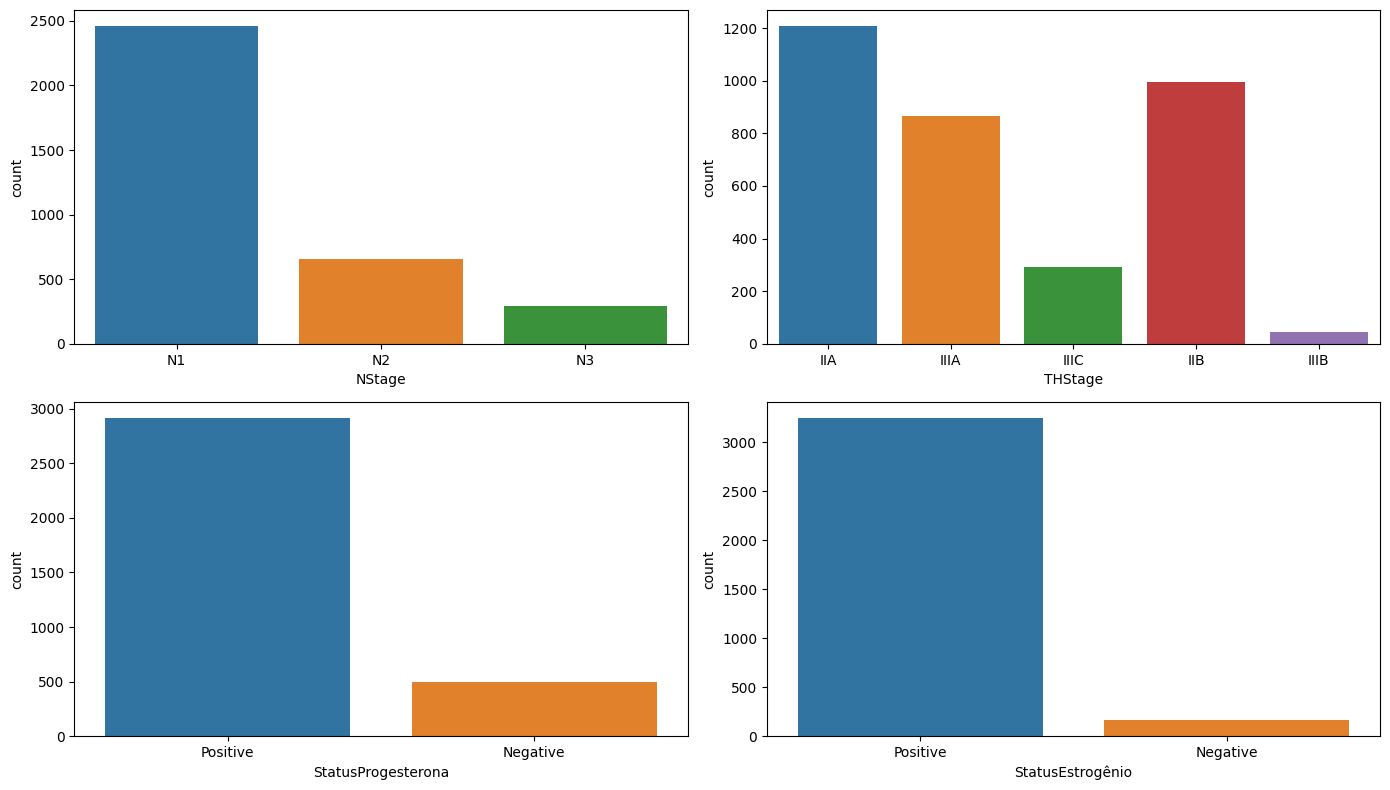

In [39]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = NaoMorreu, x="NStage", ax=axes[0][0])
sns.countplot(data = NaoMorreu, x="THStage", ax=axes[0][1])
sns.countplot(data = NaoMorreu, x="StatusProgesterona", ax=axes[1][0])
sns.countplot(data = NaoMorreu, x="StatusEstrogênio", ax=axes[1][1])
plt.show()

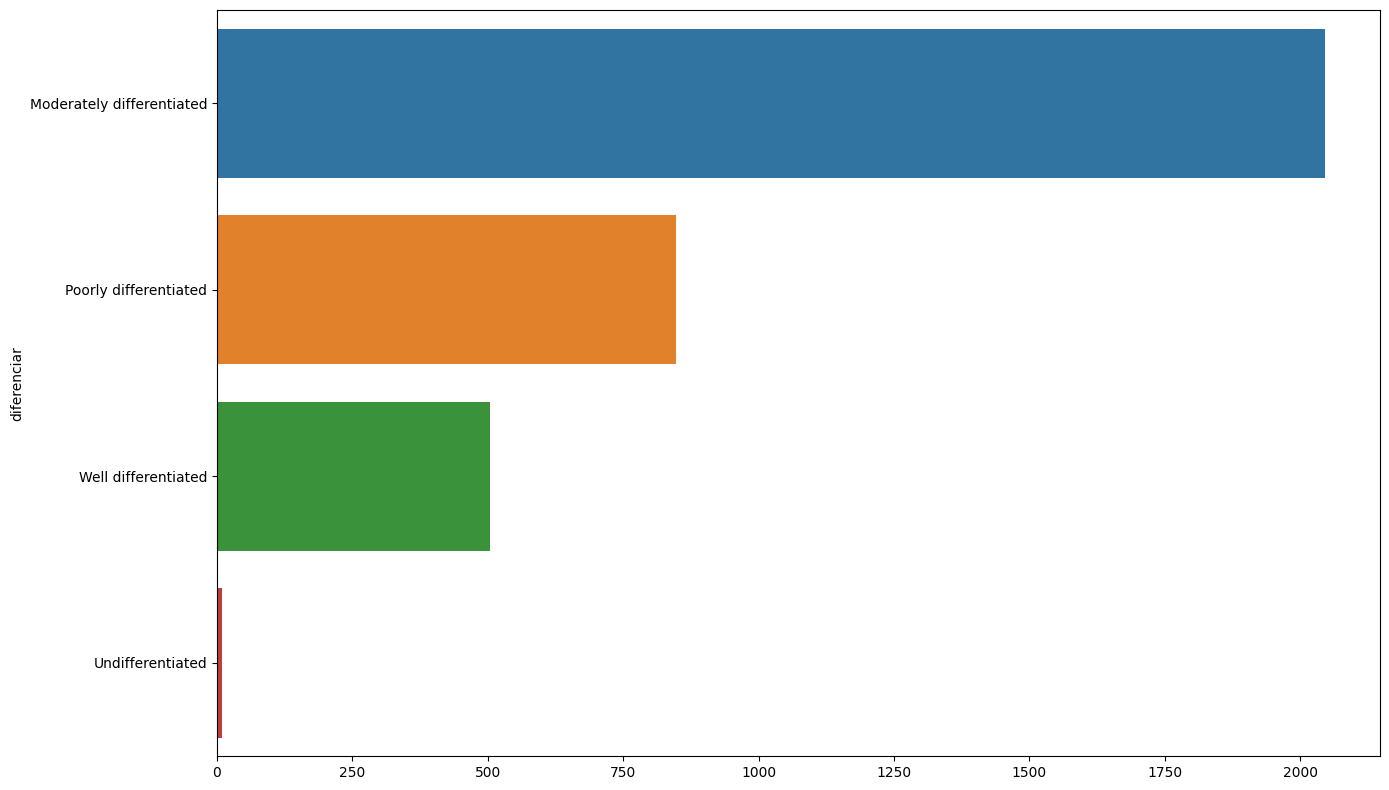

In [40]:
# Identificando os modelos mais vendidos
x = NaoMorreu['diferenciar'].value_counts().values
y = NaoMorreu['diferenciar'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

### CRIANDO UM DATAFRAME PARA VER AS MÉDIAS DOS DO TAMANHO DOS TUMORES E MESES DE SOBREVIVÊNCIA 

In [41]:
Quantidade = NaoMorreu.groupby(["Status"])["TamanhoTumor"].count().rename('Quantidade')
tumor = NaoMorreu.groupby(['Status'])['TamanhoTumor'].mean().rename('MédiaDoTumor')
sovrevivencia =NaoMorreu.groupby(['Status'])['MesesHospital'].mean().rename('MédiaSobrevivência')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'MédiaDoTumor':tumor,'MédiaSobrevivência':sovrevivencia})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaDoTumor,MédiaSobrevivência
Status,,,
Alive,3407,29.27,75.95


## PESSOAS QUE MORRERAM

In [42]:
Morreu = df_traduzida.loc[df_traduzida['Status'] == 'Dead']
Morreu.head(1)

,Age,TStage,NStage,THStage,diferenciar,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
7,40,T2,N1,IIB,Moderately differentiated,30,Positive,Positive,9,1,14,Dead


In [43]:
Morreu.groupby(Morreu['NStage']).size()

NStage
N1    270
N2    165
N3    181
dtype: int64

In [44]:
Morreu.groupby(Morreu['THStage']).size() 

THStage
IIA      96
IIB     135
IIIA    184
IIIB     20
IIIC    181
dtype: int64

In [45]:
Morreu.groupby(Morreu['diferenciar']).size()

diferenciar
Moderately differentiated    305
Poorly differentiated        263
Undifferentiated               9
Well differentiated           39
dtype: int64

In [46]:
Morreu.groupby(Morreu['StatusEstrogênio']).size()

StatusEstrogênio
Negative    108
Positive    508
dtype: int64

In [47]:
Morreu.groupby(Morreu['StatusProgesterona']).size()

StatusProgesterona
Negative    204
Positive    412
dtype: int64

### PLOTANDO EM UM GRAFICO

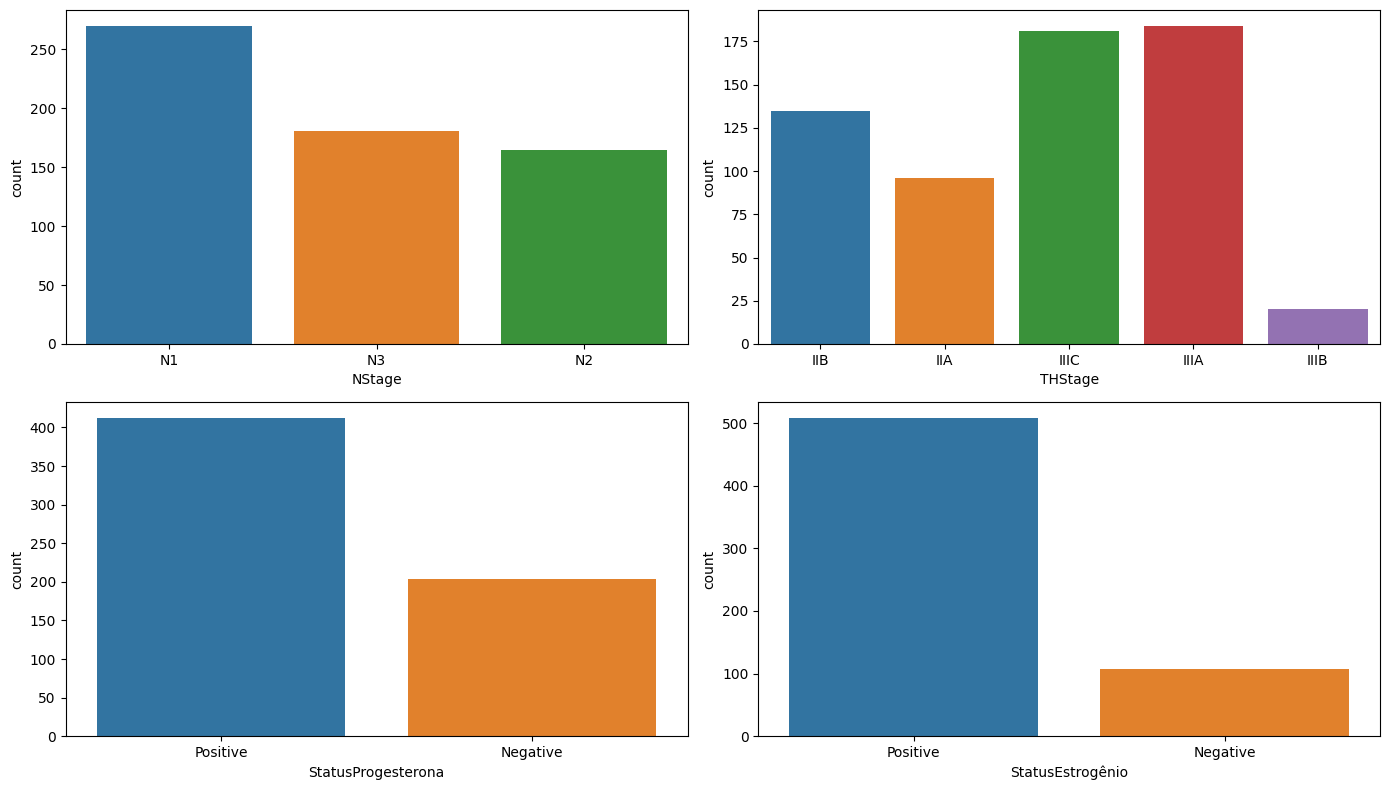

In [48]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Morreu, x="NStage", ax=axes[0][0])
sns.countplot(data = Morreu, x="THStage", ax=axes[0][1])
sns.countplot(data = Morreu, x="StatusProgesterona", ax=axes[1][0])
sns.countplot(data = Morreu, x="StatusEstrogênio", ax=axes[1][1])
plt.show()

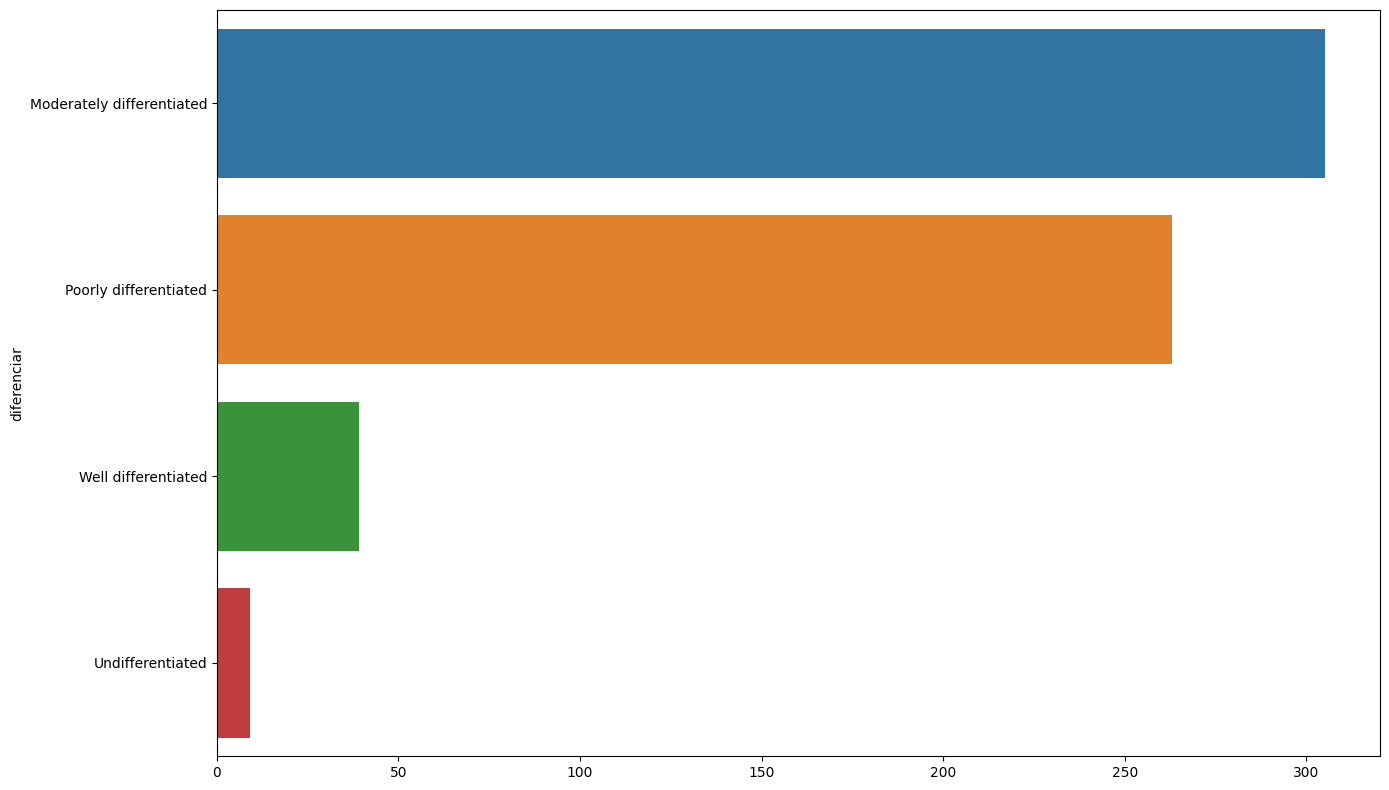

In [49]:
x = Morreu['diferenciar'].value_counts().values
y = Morreu['diferenciar'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

### CRIANDO UM DATAFRAME PARA VER AS MÉDIAS DOS DO TAMANHO DOS TUMORES E MESES DE SOBREVIVÊNCIA 

In [50]:
Quantidade = Morreu.groupby(["Status"])["TamanhoTumor"].count().rename('Quantidade')
tumor = Morreu.groupby(['Status'])['TamanhoTumor'].mean().rename('MédiaDoTumor')
sovrevivencia =Morreu.groupby(['Status'])['MesesHospital'].mean().rename('MédiaSobrevivência')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'MédiaDoTumor':tumor,'MédiaSobrevivência':sovrevivencia})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaDoTumor,MédiaSobrevivência
Status,,,
Dead,616,37.14,45.61


# MACHINE LEARNING

## PRÉ-PROCESSAMENTO

### CONVERTENDO VARIAVÉL CATEGORICA EM NÚMERICA

In [51]:
# Mapeando os valores
status_map = {'Alive': 1, 'Dead': 0}
df_traduzida['Status'] = df_traduzida['Status'].map(status_map)

nodulo_map = {'Positive': 1, 'Negative': 0}
df_traduzida['StatusEstrogênio'] = df_traduzida['StatusEstrogênio'].map(nodulo_map)

nodulo_map1 = {'Positive': 1, 'Negative': 0}
df_traduzida['StatusProgesterona'] = df_traduzida['StatusProgesterona'].map(nodulo_map1)

In [52]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['TStage'] = lb.fit_transform(df_traduzida['TStage'])
df_traduzida['NStage'] = lb.fit_transform(df_traduzida['NStage'])
df_traduzida['THStage'] = lb.fit_transform(df_traduzida['THStage'])
df_traduzida['diferenciar'] = lb.fit_transform(df_traduzida['diferenciar'])
# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [53]:
df_traduzida.head(1)

,Age,TStage,NStage,THStage,diferenciar,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
0,68,0,0,0,1,4,1,1,24,1,60,1


### VERIFICANDO VARIAVÉIS MAIS IMPORTANTES PRO MODELO

In [54]:

Xi = df_traduzida.iloc[:, :-1]
yi = df_traduzida.iloc[:, -1]

In [55]:
Xi.head()

,Age,TStage,NStage,THStage,diferenciar,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital
0,68,0,0,0,1,4,1,1,24,1,60
1,50,1,1,2,0,35,1,1,14,5,62
2,58,2,2,4,0,63,1,1,14,7,75
3,58,0,0,0,1,18,1,1,2,1,84
4,47,1,0,1,1,41,1,1,3,1,50


In [56]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(Xi, yi)

ExtraTreesClassifier()

In [57]:
# Print dos Resultados
print(df_traduzida.columns[0:12])
print(modelo.feature_importances_)

Index(['Age', 'TStage', 'NStage', 'THStage', 'diferenciar', 'TamanhoTumor',
       'StatusEstrogênio', 'StatusProgesterona', 'NoduloRegionalExaminado',
       'NoduloReginolPositivo', 'MesesHospital', 'Status'],
      dtype='object')
[0.13087715 0.02755147 0.03170663 0.03449871 0.04165349 0.11885668
 0.02127754 0.02490245 0.12384685 0.08329837 0.36153065]


### EXCLUINDO VARIAVÉIS NÃO IMPORTANTE

In [58]:
del df_traduzida['THStage']
del df_traduzida['NStage']
del df_traduzida['TStage']
del df_traduzida['diferenciar']

In [59]:

from sklearn.model_selection import train_test_split, cross_val_score


# Separando as características (X) e rótulos (y)
X = df_traduzida.drop('Status', axis=1)  # Todas as colunas exceto 'Status'
y = df_traduzida['Status']  # Coluna 'Status'


Contagem de classes antes do balanceamento:
Status
1    3407
0     616
Name: count, dtype: int64

Contagem de classes após o balanceamento:
Status
1    3407
0    3407
Name: count, dtype: int64


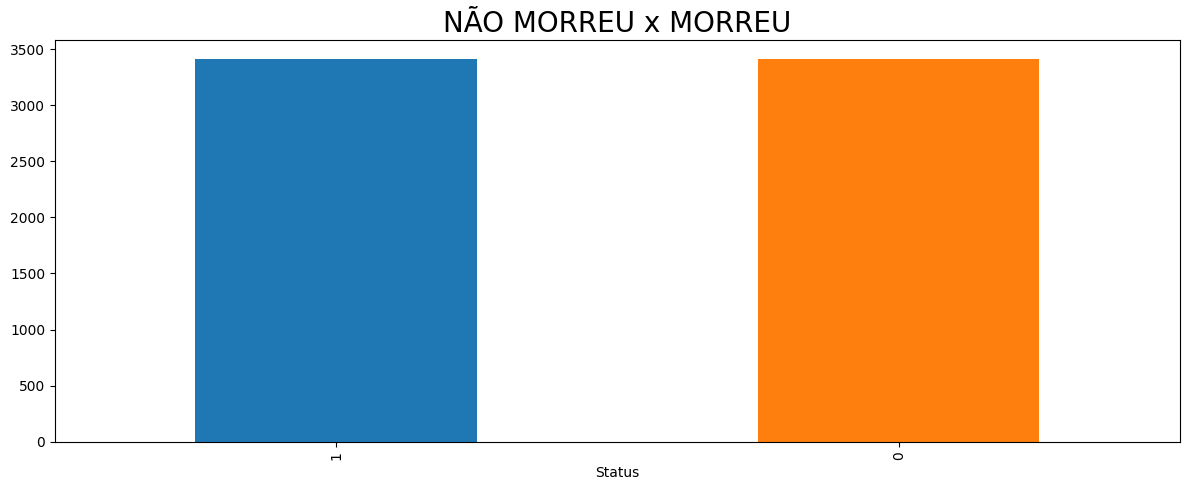

In [60]:

# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='NÃO MORREU x MORREU',color = ['#1F77B4', '#FF7F0E']);

### TREINANDO O MODELO E TESTANDO COM VALIDAÇÃO CRUZADA

In [61]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Criando o modelo XGBoost
model = xgb.XGBClassifier(random_state=seed)

# Treinando o modelo com os dados de treinamento
model.fit(X_res, y_res)

# Realizando validação cruzada k-fold com k=5
y_pred = cross_val_predict(model, X_res, y_res, cv=5)
scores = cross_val_score(model, X_res, y_res, cv=5)

# Imprimindo as pontuações de validação cruzada
print("Pontuações de validação cruzada:", scores)

# Calculando e imprimindo a média das pontuações
print("Média das pontuações de validação cruzada:", scores.mean())

# Calculando e imprimindo a matriz de confusão
conf_mat = confusion_matrix(y_res, y_pred)
print("Matriz de confusão:\n", conf_mat)

# Calculando e imprimindo a precisão, recall e F1-score
precision = precision_score(y_res, y_pred)
recall = recall_score(y_res, y_pred)
f1 = f1_score(y_res, y_pred)

print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



Pontuações de validação cruzada: [0.86353632 0.90462216 0.89508437 0.89948643 0.88986784]
Média das pontuações de validação cruzada: 0.8905194230141467
Matriz de confusão:
 [[3043  364]
 [ 382 3025]]
Precisão: 0.8926
Recall: 0.8879
F1-score: 0.8902


### FAZENDO A PREDIÇÃO

In [73]:
df_traduzida.tail(50)

,Age,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital,Status
3974,66,67,1,1,16,13,27,0
3975,68,24,1,1,13,4,65,1
3976,55,62,1,1,9,3,63,1
3977,66,11,1,1,18,4,102,1
3978,67,17,1,1,31,3,55,1
3979,55,32,1,0,21,8,80,1
3980,49,65,1,1,22,1,76,1
3981,38,58,1,1,13,3,83,1
3982,52,52,1,1,20,11,52,1
3983,65,30,1,1,14,1,62,1


In [74]:
# Fazendo previsões com o modelo treinado
Age = 46
TamanhoTumor = 28
StatusEstrogênio = 0
StatusProgesterona = 0
NoduloRegionalExaminado = 2
NoduloReginolPositivo = 1
MesesHospital = 19
parametro = [[Age,TamanhoTumor,StatusEstrogênio,StatusProgesterona,NoduloRegionalExaminado,NoduloReginolPositivo,MesesHospital]]

fazendo_previsao = model.predict(parametro)
probabilidade = model.predict_proba(parametro)

if (fazendo_previsao == 1).any():
    print('NÃO TEM PROBABILIDADE DE MORRER') 
    print(probabilidade)
else:
    print('TEM PROBABILIDADE DE MORRER')
    print(probabilidade)

TEM PROBABILIDADE DE MORRER
[[9.9944896e-01 5.5107131e-04]]


### SALVAR O MODELO PRA COLOCAR EM PRODUÇÃO

In [64]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("Maquina_PreditivaCancer.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close() 

In [65]:
import streamlit

print("Versão do Streamlit instalada:", streamlit.__version__)


Versão do Streamlit instalada: 1.27.2
